### Queueing Structures

- Stack:
    - First-In-Last-Out(FILO) or Last-In-First-Out(LIFO)
- Queue:
    - First-In-First-Out (FIFO)
- Priority Queue:
    - Highest priority item is kept first always

<div>
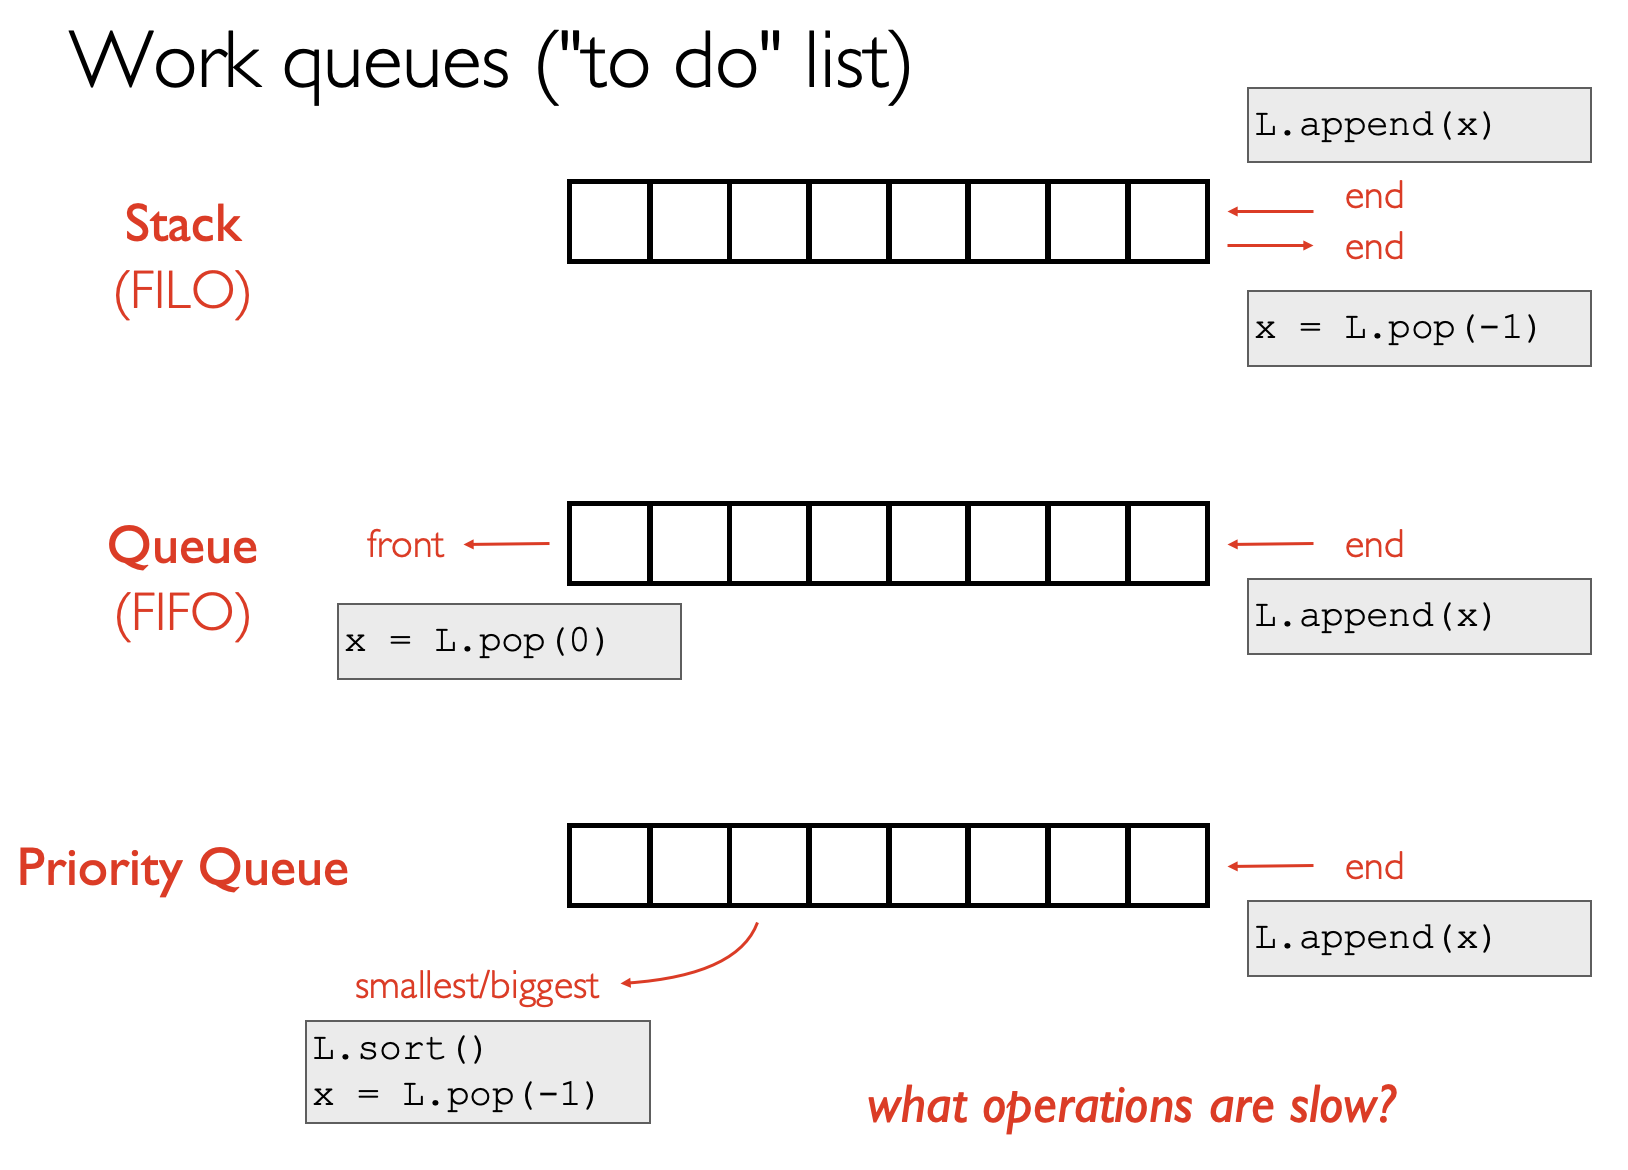
</div>

Slow operations:
- `x = L.pop(0)`
- `L.sort()`

### Using `heapq` (priority queue)

**IMPORTANT**: Unlike `deque`, `heapq` is not a type by itself.

- Operations:
    - `heapq.heappush(LIST, VAL)`:
        - adds VAL to the list
        - shuffles around the values so that the smallest value is in the front
        - does so in **O(log N)** time (so it is not sorting, but just shuffling)
    - `val = heapq.heappop(LIST)`
        - removes the smallest item from the list
        - re-shuffles around the values so that the smallest value is in the front
        - does so in **O(log N)** time (so it is not sorting, but just shuffling)
    - `heapq.heapify(LIST)`
        - shuffles value to move smallest value to the front

In [25]:
data = []
vals = [5, 3, 1, 4, 2]
for val in vals:
    heapq.heappush(data, val)
data

[1, 2, 3, 5, 4]

In [26]:
while len(data) > 0:
    val = heapq.heappop(data)
    print(val, data)

1 [2, 4, 3, 5]
2 [3, 4, 5]
3 [4, 5]
4 [5]
5 []


In [ ]:
data = [5, 3, 1, 4, 2]
heapq.heapify(data)
print(data)

### Benchmarking `stack`, `queue`, and `priority queue` for performance

,stack,queue,prio queue
1000,0.293255,0.555992,12.159348
2000,0.262499,0.592947,19.998550
5000,0.139952,1.065969,34.415960
10000,0.148058,1.941681,65.610886


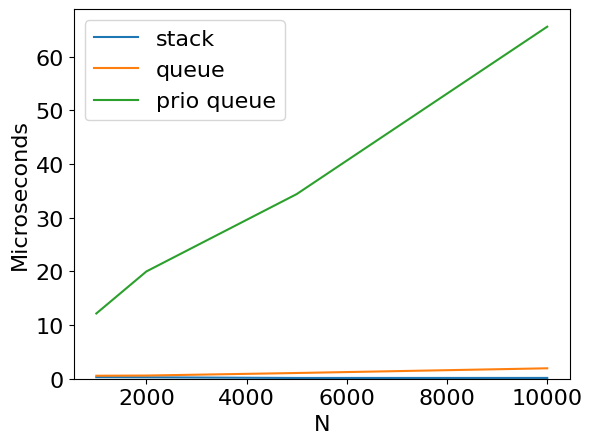

In [27]:
iters = 1000

def benchmark_microsec(data, pattern):
    """
    Benchmarking "stack", "queue", "priority queue" 
    implementations using a list data structure
    """
    t0 = time.time()
    for i in range(iters):
        if pattern == "stack":
            data.append(i % 10)
            _ = data.pop(-1)
        elif pattern == "queue":
            data.append(i % 10)
            _ = data.pop(0)
        elif pattern == "prio queue":
            data.append(i % 10)
            data.sort()
            _ = data.pop(0)
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [1000,2000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec([1]*N, "stack")
    #df.loc[N,"queue"] = benchmark_microsec([1]*N, "queue")
    #df.loc[N,"prio queue"] = benchmark_microsec([1]*N, "prio queue")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df

,stack,queue,prio queue
1000,0.246286,0.192881,0.658035
2000,0.154257,0.158548,0.625134
5000,0.141382,0.161171,0.543356
10000,0.149488,0.196934,0.569344


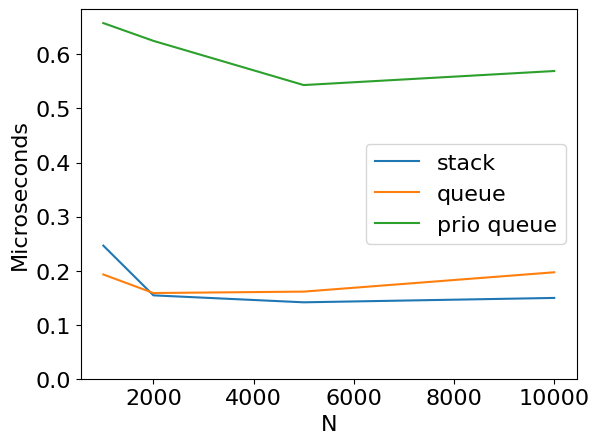

In [28]:
def benchmark_microsec_v2(data, pattern):
    """
    Benchmarking "stack", "queue", "priority queue" 
    implementations using list, deque, and heapq list data structures
    """
    t0 = time.time()
    for i in range(iters):
        if pattern == "stack":
            # still uses list
            data.append(i % 10)
            _ = data.pop(-1)
        elif pattern == "queue":
            # use a deque instead of a list
            data.append(i % 10)
            _ = data.popleft()
        elif pattern == "prio queue":
            # use a heapq instead of a list
            heapq.heappush(data, i % 10)
            _ = heapq.heappop(data)
            
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [1000,2000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec_v2([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec_v2(deque([1]*N), "queue")
    data = [1]*N
    heapq.heapify(data)
    df.loc[N,"prio queue"] = benchmark_microsec_v2(data, "prio queue")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df